## ANÁLISIS EXPLORATORIO DE LOS DATOS (EDA) ##

#### _Durante mi Análisis Exploratorio de Datos (EDA), examiné la penetración de internet a nivel nacional, así como las distintas tecnologías empleadas y las velocidades promedio. Este análisis ofrece una visión integral de la conectividad digital en el país_. ####

Se importan las librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Se cargan los datos desde un archivo excel y las hojas de datos que utilizaran para el análisis

In [2]:
archivo = pd.read_excel("Internet.xlsx", sheet_name=None)
penetracion_totales = archivo["Penetracion-totales"]
penetracion_hogares = archivo["Penetracion-hogares"]
penetracion_poblacion = archivo["Penetración-poblacion"]
total_acceso_por_tecno = archivo["Totales Accesos Por Tecnología"]
total_accesos_por_velo = archivo["Totales Accesos por velocidad"]


Verificamos si hay datos faltantes en cada hoja del dataset

In [3]:
print(penetracion_totales.isna().sum().sum())
print(penetracion_hogares.isna().sum().sum())
print(penetracion_poblacion.isna().sum().sum())
print(total_acceso_por_tecno.isna().sum().sum())
print(total_accesos_por_velo.isna().sum().sum())

0
0
0
0
0


Verificamos si hay datos duplicados en cada hoja del dataset

In [4]:
print(penetracion_totales[penetracion_totales.duplicated()].shape[0])
print(penetracion_hogares[penetracion_hogares.duplicated()].shape[0])
print(penetracion_poblacion[penetracion_poblacion.duplicated()].shape[0])
print(total_acceso_por_tecno[total_acceso_por_tecno.duplicated()].shape[0])
print(total_accesos_por_velo[total_accesos_por_velo.duplicated()].shape[0])

0
0
0
0
0


Visualizamos el dataset "Penetracion-totales"

In [5]:
penetracion_totales.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2024,1,78.89,24.79,Ene-Mar 2024
1,2023,4,78.56,24.66,Oct-Dic 2023
2,2023,3,77.84,24.41,Jul-Sept 2023
3,2023,2,77.02,24.14,Abr-Jun 2023
4,2023,1,77.20,24.17,Ene-Mar 2023


Distribución y variabilidad de los valores en cada columna.

In [6]:
penetracion_totales.describe()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,41.000000,41.000000,41.000000,41.000000
mean,2018.634146,2.463415,62.837711,19.452761
std,2.997967,1.142313,9.786571,3.211263
min,2014.000000,1.000000,49.545821,15.050104
25%,2016.000000,1.000000,53.734186,16.504676
50%,2019.000000,2.000000,62.479166,19.307907
75%,2021.000000,3.000000,70.578853,21.982550
max,2024.000000,4.000000,78.890000,24.790000


Verificamos si hay datos faltantes y duplicados

Aquí generamos un grafico de lineas que nos muestre las tendencias de penetración de internet en Argentina, comparando los accesos entre hogares e individuos a lo largo de la última década.

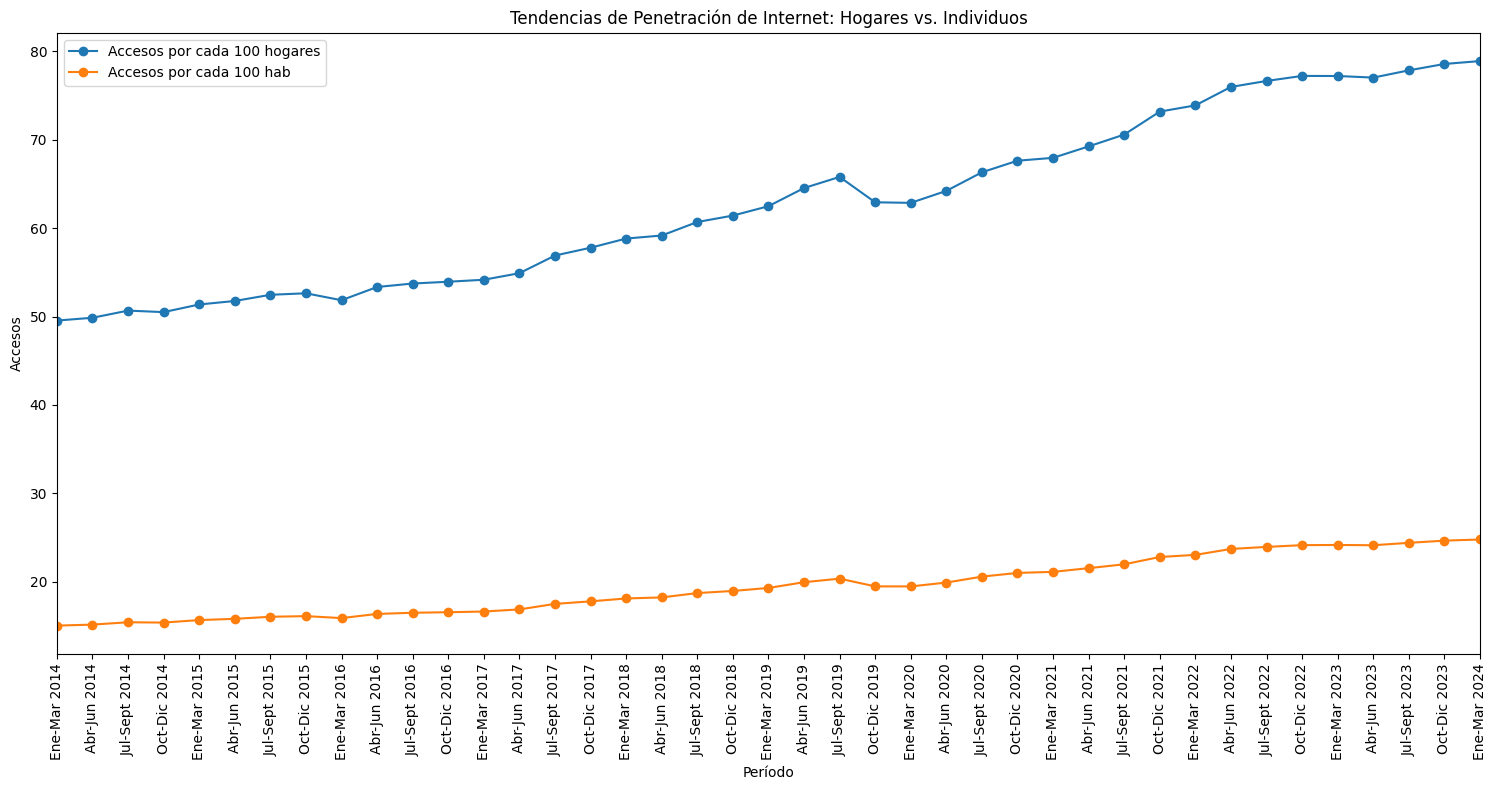

In [7]:
plt.figure(figsize=(15, 8))
plt.plot(penetracion_totales['Periodo'], penetracion_totales['Accesos por cada 100 hogares'], label='Accesos por cada 100 hogares', marker='o')
plt.plot(penetracion_totales['Periodo'], penetracion_totales['Accesos por cada 100 hab'], label='Accesos por cada 100 hab', marker='o')
plt.title('Tendencias de Penetración de Internet: Hogares vs. Individuos')
plt.xlabel('Período')
plt.ylabel('Accesos')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.xlim('Ene-Mar 2014', 'Ene-Mar 2024')

plt.show()

**Conclusión:** Mientras que el acceso a internet en los hogares ha crecido, a nivel individual no ha habido cambios significativos. Esto podría indicar que las mejoras en la conectividad se han centrado más en los hogares que en los individuos.

Ahora visualizamos el dataset "Penetracion-hogares"

In [8]:
penetracion_hogares.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,1,Buenos Aires,81.10
1,2024,1,Capital Federal,119.53
2,2024,1,Catamarca,68.82
3,2024,1,Chaco,46.70
4,2024,1,Chubut,84.89


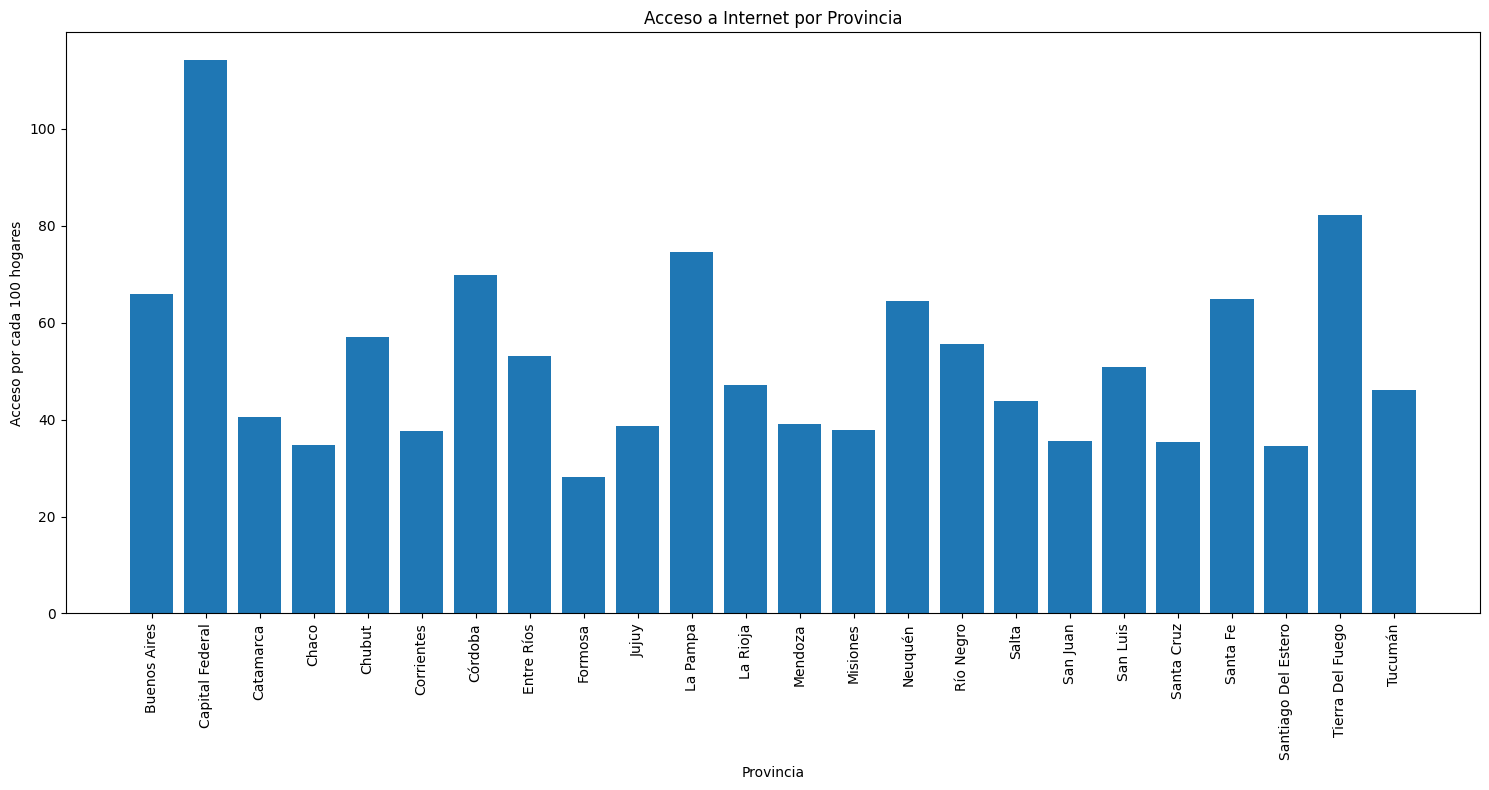

In [9]:
promedio_acceso = penetracion_hogares.groupby('Provincia')['Accesos por cada 100 hogares'].mean()
plt.figure(figsize=(15, 8))
plt.bar(promedio_acceso.index, promedio_acceso.values)
plt.xlabel('Provincia')
plt.ylabel('Acceso por cada 100 hogares')
plt.title('Acceso a Internet por Provincia')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

**Conclusión:** este gráfico destaca las diferencias en el acceso a Internet entre las provincias argentinas y sugiere áreas de enfoque para mejorar la conectividad

Distribución y variabilidad de los valores en cada columna.

In [10]:
penetracion_hogares.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,984.000000,984.000000,984.000000
mean,2018.634146,2.463415,52.159491
std,2.962686,1.128870,24.036101
min,2014.000000,1.000000,9.347208
25%,2016.000000,1.000000,33.204632
50%,2019.000000,2.000000,49.435000
75%,2021.000000,3.000000,65.706626
max,2024.000000,4.000000,124.061394


Agrupamos los datos del archivo según los campos ‘Año’ y ‘Trimestre’, calculamos la media de los ‘Accesos por cada 100 hogares’ y luego, en el gráfico de líneas, se muestra la evolución de esta media a lo largo del tiempo. Así analizamos la tendencia de los accesos a Internet en hogares a lo largo de los trimestres.

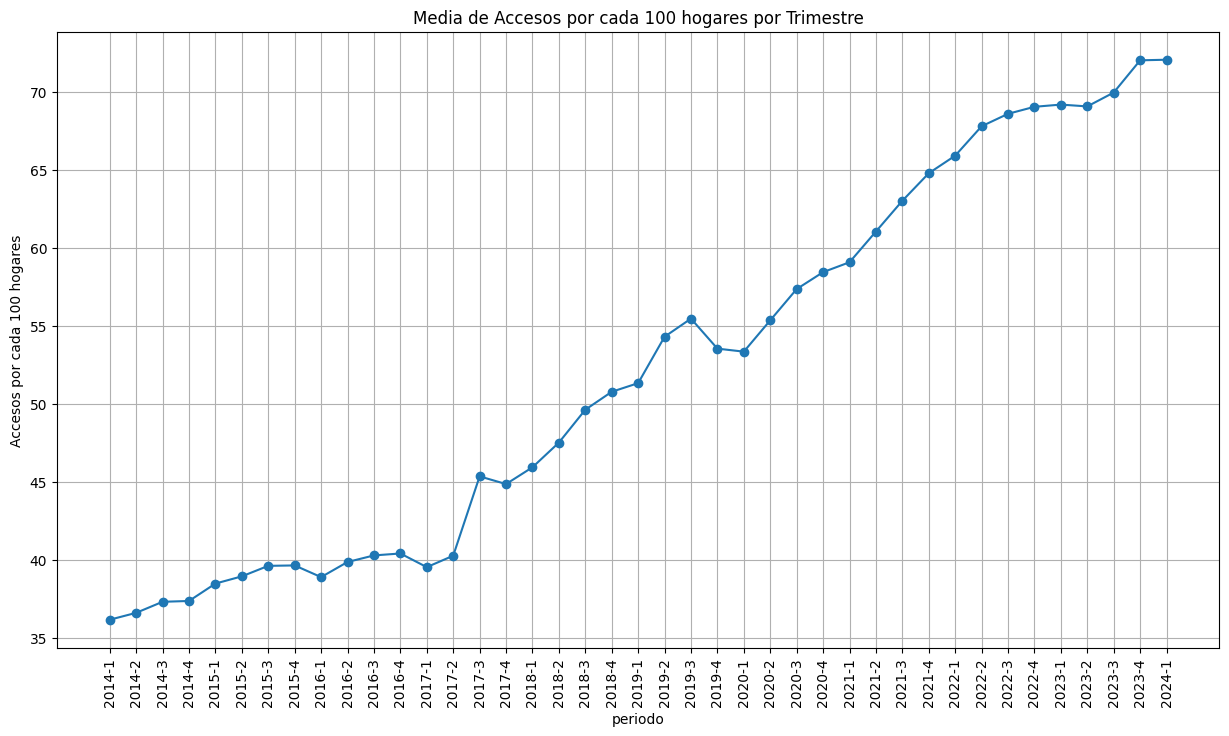

In [11]:
media_por_trimestre = archivo["Penetracion-hogares"].groupby(["Año", "Trimestre"])["Accesos por cada 100 hogares"].mean()
plt.figure(figsize=(15, 8))
media_por_trimestre.plot(marker='o')
plt.title("Media de Accesos por cada 100 hogares por Trimestre")
plt.xlabel("periodo")
plt.ylabel("Accesos por cada 100 hogares")
plt.grid(True)
plt.xticks(rotation=90)
trimestre_labels = [f"{a}-{t}" for a, t in media_por_trimestre.index]
plt.xticks(range(len(trimestre_labels)), trimestre_labels)

plt.show()

**Conclusión:** El gráfico muestra una tendencia creciente en el acceso a Internet, este aumento podría estar relacionado con el desarrollo tecnológico o cambios en el comportamiento de los hogares.

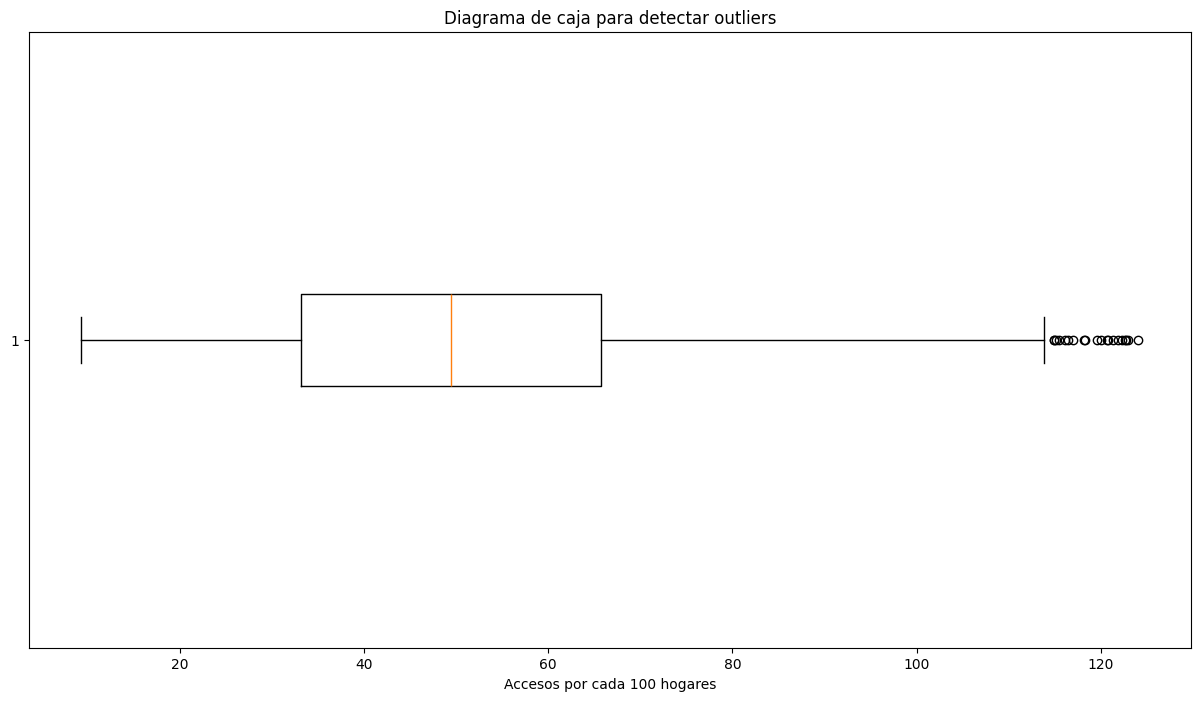

In [12]:
plt.figure(figsize=(15, 8))
plt.boxplot(penetracion_hogares["Accesos por cada 100 hogares"], vert=False)
plt.xlabel("Accesos por cada 100 hogares")
plt.title("Diagrama de caja para detectar outliers")
plt.show()

Algunos puntos se encuentran por encima del promedio, lo que sugiere áreas con una penetración de Internet excepcionalmente alta.

Visualizamos el dataset "Penetración-pobacion"

In [13]:
penetracion_poblacion

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,1,Buenos Aires,27.800000
1,2024,1,Capital Federal,48.780000
2,2024,1,Catamarca,17.500000
3,2024,1,Chaco,12.480000
4,2024,1,Chubut,26.020000
...,...,...,...,...
979,2014,1,Santa Cruz,8.677327
980,2014,1,Santa Fe,15.077801
981,2014,1,Santiago Del Estero,4.058899
982,2014,1,Tierra Del Fuego,19.104921


Distribución y variabilidad de los valores en cada columna.

In [14]:
penetracion_poblacion.describe()

,Año,Trimestre,Accesos por cada 100 hab
count,984.000000,984.000000,984.000000
mean,2018.634146,2.463415,15.537902
std,2.962686,1.128870,9.205334
min,2014.000000,1.000000,2.684669
25%,2016.000000,1.000000,8.909018
50%,2019.000000,2.000000,13.571293
75%,2021.000000,3.000000,19.972549
max,2024.000000,4.000000,52.236739


Agrupamos los datos del archivo según los campos ‘Año’ y ‘Trimestre’, calculamos la media de los ‘Accesos por cada 100 habitantes’, como se hizo en el dataset de hogares

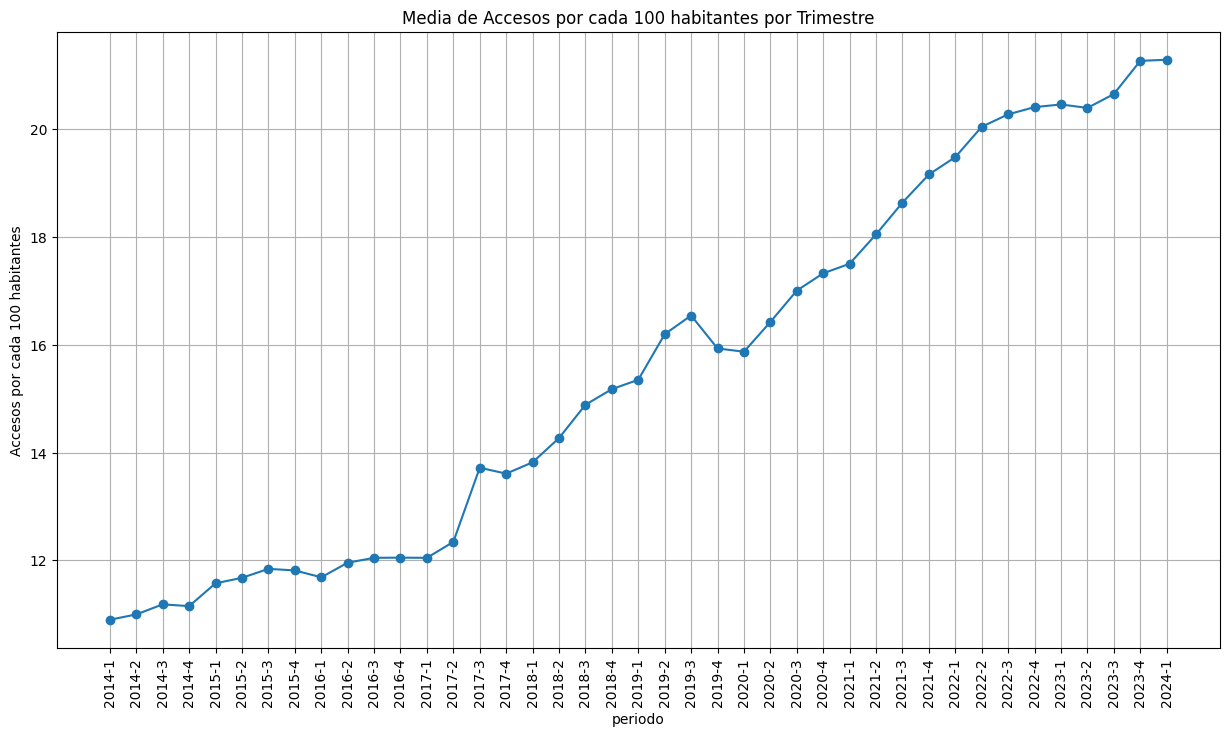

In [15]:
media_por_trimestre = archivo["Penetración-poblacion"].groupby(["Año", "Trimestre"])["Accesos por cada 100 hab"].mean()
plt.figure(figsize=(15, 8))
media_por_trimestre.plot(marker='o')
plt.title("Media de Accesos por cada 100 habitantes por Trimestre")
plt.xlabel("periodo")
plt.ylabel("Accesos por cada 100 habitantes")
plt.grid(True)
plt.xticks(rotation=90)
trimestre_labels = [f"{a}-{t}" for a, t in media_por_trimestre.index]
plt.xticks(range(len(trimestre_labels)), trimestre_labels)

plt.show()

**Conclusión:** Comienza en alrededor de 2 accesos por cada 100 habitantes en el primer trimestre de 2014 y aumenta gradualmente hasta poco más de 20 accesos por cada 100 habitantes a mediados de 2022. Hay fluctuaciones trimestrales en la media, pero la tendencia general es de crecimiento sostenido.

Visualizamos el dataset "Totales Accesos Por Tecnología"

In [16]:
total_acceso_por_tecno.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2024,1,774475,5986957,4015101,598682,257941,11633156,Ene-Mar 2024
1,2023,4,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023
2,2023,3,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023
3,2023,2,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023
4,2023,1,1204417,6002582,3243411,576647,214838,11241895,Ene-Mar 2023


Distribución y variabilidad de los valores en cada columna.

In [17]:
total_acceso_por_tecno.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,41.000000,41.000000,4.100000e+01,4.100000e+01,4.100000e+01,41.000000,41.000000,4.100000e+01
mean,2018.634146,2.463415,2.742682e+06,4.398940e+06,1.152858e+06,297246.780488,157362.390244,8.749089e+06
std,2.997967,1.142313,1.062552e+06,1.316336e+06,1.251751e+06,200464.379073,83211.380279,1.699043e+06
min,2014.000000,1.000000,7.744750e+05,2.407330e+06,1.391870e+05,70749.000000,54300.000000,6.398398e+06
25%,2016.000000,1.000000,1.950631e+06,3.124855e+06,1.698980e+05,85370.000000,70049.000000,7.206950e+06
50%,2019.000000,2.000000,3.132789e+06,4.435439e+06,6.370990e+05,276419.000000,178485.000000,8.648135e+06
75%,2021.000000,3.000000,3.714764e+06,5.826257e+06,1.566048e+06,492415.000000,247016.000000,1.008554e+07
max,2024.000000,4.000000,3.803024e+06,6.073426e+06,4.015101e+06,598682.000000,265328.000000,1.163316e+07


Se procesan los datos y crea un gráfico de líneas para visualizar la evolución de los accesos a Internet según diferentes tecnologías a lo largo de los trimestres.

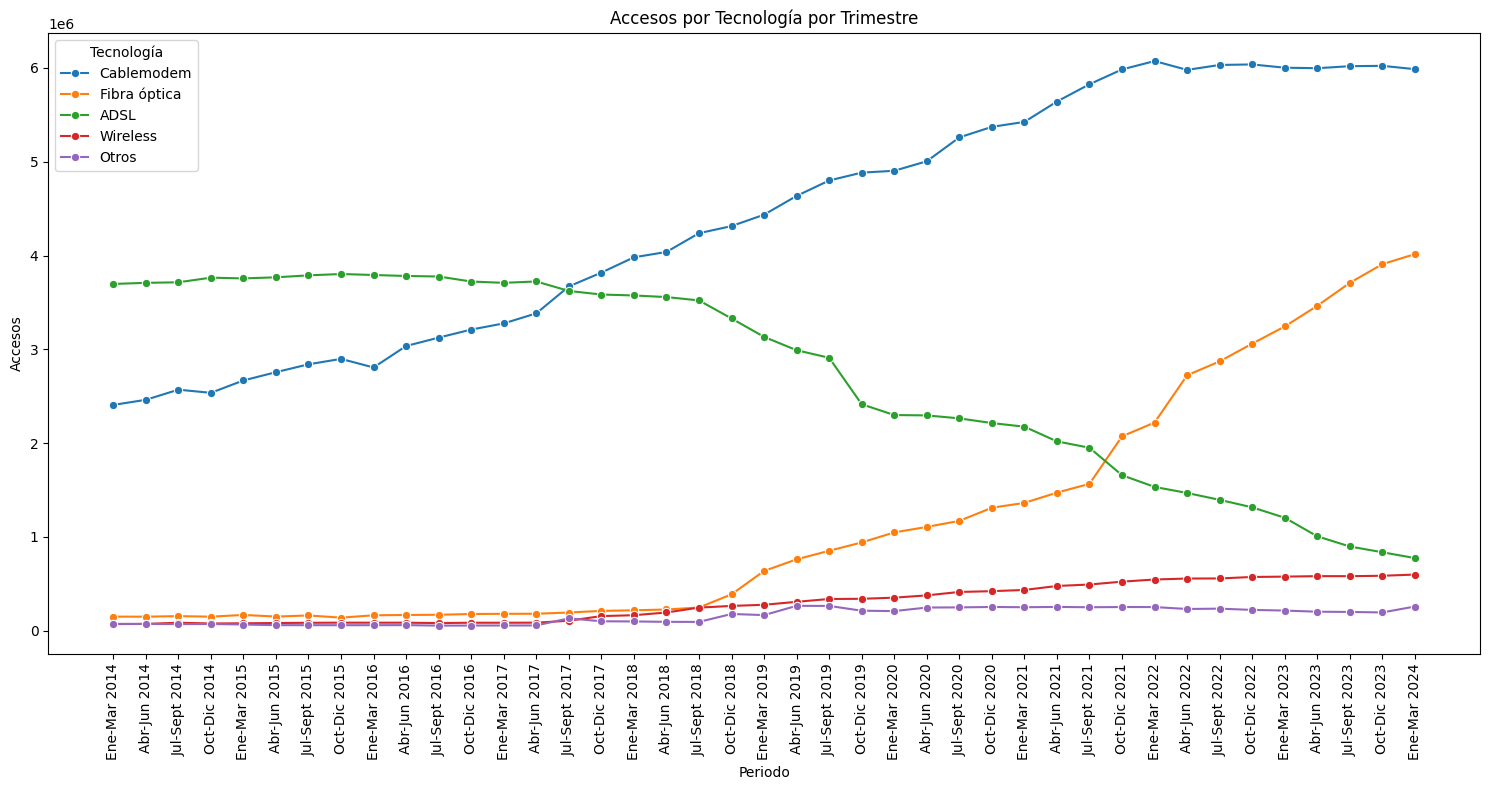

In [18]:
df_melt_3 = total_acceso_por_tecno.melt(id_vars=['Año', 'Trimestre', 'Periodo'], value_vars=['Cablemodem', 'Fibra óptica', 'ADSL',	'Wireless',	'Otros' ], var_name='Tecnología', value_name='Accesos')
df_melt_3['Periodo'] = pd.Categorical(df_melt_3['Periodo'], categories=total_acceso_por_tecno['Periodo'][::-1], ordered=True)
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_melt_3, x='Periodo', y='Accesos', hue='Tecnología', marker='o')
plt.title('Accesos por Tecnología por Trimestre')
plt.xlabel('Periodo')
plt.ylabel('Accesos')
plt.xticks(rotation=90)
plt.legend(title='Tecnología')
plt.tight_layout()
plt.show()

**Conclusión:** Las conexiones inalámbricas también aumentaron significativamente con el tiempo.
El gráfico muestra cómo las preferencias de tecnología de acceso a Internet han cambiado a lo largo de los años. La fibra óptica y las conexiones inalámbricas han ido reemplazando gradualmente a las tecnologías fijas más antiguas.

Visualizamos ahora el dataset "Totales Accesos por velocidad"

In [19]:
total_accesos_por_velo.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2024,1,28801,69355,866152,950930,672155,353896,8363694,328173,11633156
1,2023,4,29708,71742,900253,978108,697232,350290,8224736,295592,11547661
2,2023,3,30274,80609,945608,998725,720084,350918,8003269,277421,11406908
3,2023,2,30827,79405,963510,1028250,734125,364730,7775095,275955,11251897
4,2023,1,31437,82048,1001553,1060321,729194,357769,7564819,414754,11241895


Distribución y variabilidad de los valores en cada columna.

In [20]:
total_accesos_por_velo.describe()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
count,41.000000,41.000000,41.000000,41.000000,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,41.000000,4.100000e+01
mean,2018.634146,2.463415,47210.390244,219239.463415,3.233344e+06,9.155820e+05,8.898369e+05,4.815391e+05,2.776911e+06,149513.097561,8.713176e+06
std,2.997967,1.142313,49441.161964,193062.660919,1.526298e+06,2.322244e+05,4.558204e+05,4.383245e+05,3.055797e+06,130707.129029,1.738855e+06
min,2014.000000,1.000000,5675.000000,28521.000000,8.661520e+05,2.891820e+05,1.011270e+05,3.450000e+02,1.159500e+04,0.000000,6.272846e+06
25%,2016.000000,1.000000,29708.000000,71742.000000,2.531271e+06,8.594130e+05,6.932770e+05,1.245640e+05,3.102200e+04,0.000000,7.144696e+06
50%,2019.000000,2.000000,35030.000000,195706.000000,3.316868e+06,9.794160e+05,7.993500e+05,3.647300e+05,1.138728e+06,167369.000000,8.648135e+06
75%,2021.000000,3.000000,41064.000000,294413.000000,4.816081e+06,1.060321e+06,1.038029e+06,5.959200e+05,4.948174e+06,238455.000000,1.008554e+07
max,2024.000000,4.000000,241713.000000,687619.000000,5.153437e+06,1.245333e+06,2.068087e+06,1.688748e+06,8.363694e+06,414754.000000,1.163316e+07


Este gráfico representa la evolución de las velocidades de conexión a Internet a lo largo de los años.

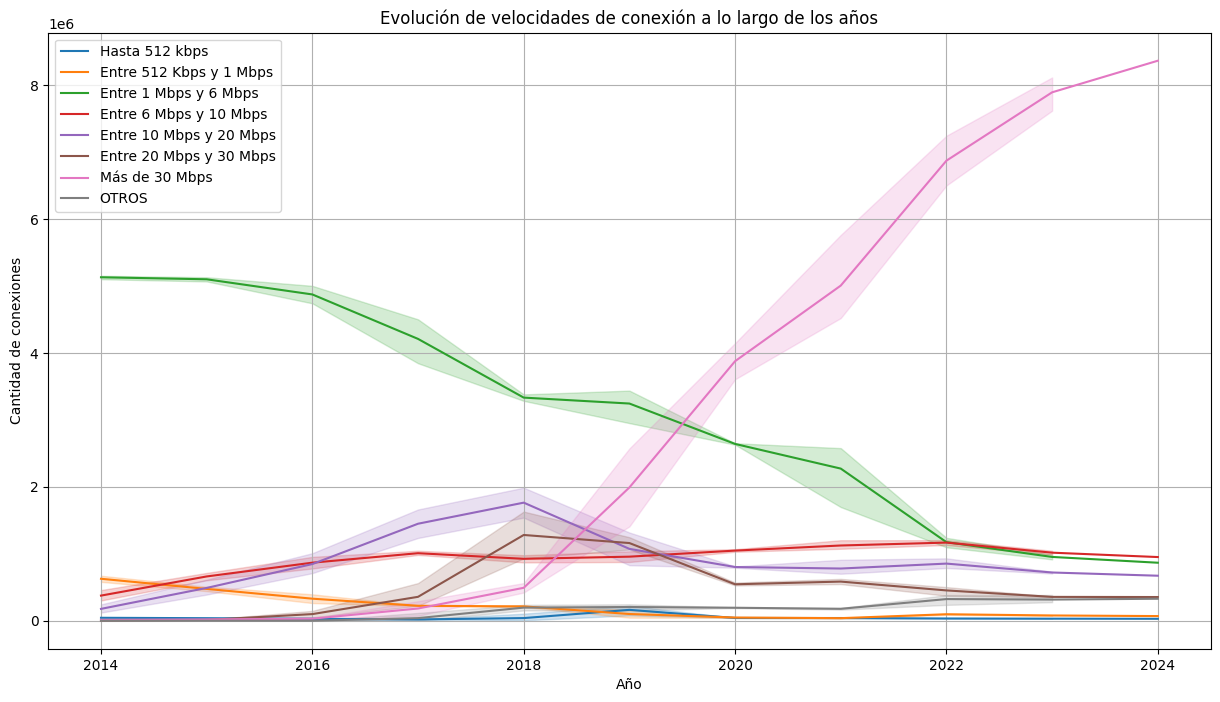

In [21]:
plt.figure(figsize=(15, 8))
velocidades = [
    'Hasta 512 kbps',
    'Entre 512 Kbps y 1 Mbps',
    'Entre 1 Mbps y 6 Mbps',
    'Entre 6 Mbps y 10 Mbps',
    'Entre 10 Mbps y 20 Mbps',
    'Entre 20 Mbps y 30 Mbps',
    'Más de 30 Mbps',
    'OTROS'
]
for velocidad in velocidades:
    sns.lineplot(x=total_accesos_por_velo['Año'], y=total_accesos_por_velo[velocidad], label=velocidad)

plt.xlabel("Año")
plt.ylabel("Cantidad de conexiones")
plt.title("Evolución de velocidades de conexión a lo largo de los años")
plt.legend()
plt.grid(True)
plt.show()

El gráfico muestra una evolución positiva en las velocidades de conexión a Internet, con una clara mejora en la calidad de las conexiones disponibles para las personas, las categorías de velocidad más bajas, como “Hasta 512 Kbps”, han disminuido significativamente. Esto indica que menos personas están utilizando conexiones muy lentas.